# Libraries

In [9]:
import scipy.io as sio
import sys

import pandas as pd
import numpy as np

import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.api import VAR
import statistics

sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts
from ltar import LTAR

In [10]:
sst = sio.loadmat('data/sst.mat')
sst

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:14:49 2013',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[array([[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]])],
        [array([[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]])],
        [array([[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]])],
        ...,
        [array([[29.58, 29.12,

In [11]:
N = len(sst['X'])
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [12]:
tensor_shape = (len(sst['X']), sst['X'][0][0].shape[0], sst['X'][0][0].shape[1])
tensor_shape

(2000, 5, 6)

In [13]:
tensor_data = np.zeros(tensor_shape)
for i in range(tensor_shape[0]):
    tensor_data[i] = sst['X'][i][0]
tensor_data

array([[[28.15, 28.27, 28.05, 28.39, 28.67, 29.26],
        [28.43, 28.81, 27.88, 28.09, 27.12, 26.99],
        [28.12, 27.69, 28.03, 26.9 , 25.84, 24.95],
        [28.56, 28.36, 28.44, 28.35, 27.3 , 25.71],
        [29.29, 29.73, 29.18, 28.41, 27.63, 27.01]],

       [[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
        [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
        [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
        [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
        [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]],

       [[28.19, 28.3 , 28.09, 28.65, 28.68, 29.66],
        [28.44, 28.81, 27.93, 28.09, 27.42, 27.33],
        [28.13, 27.74, 28.05, 27.03, 26.17, 25.14],
        [28.57, 28.33, 28.52, 28.6 , 27.55, 25.98],
        [29.34, 29.83, 29.22, 28.74, 27.63, 27.01]],

       ...,

       [[29.58, 29.12, 29.23, 28.31, 27.29, 27.73],
        [29.33, 28.95, 28.56, 25.8 , 25.68, 23.33],
        [29.65, 28.86, 28.2 , 25.91, 23.54, 22.22],
        [30.19, 29.18, 28.15, 26.98, 25.32, 2

In [14]:
tensor_data[1]

array([[28.16, 28.27, 28.06, 28.53, 28.68, 29.44],
       [28.43, 28.81, 27.89, 28.09, 27.19, 27.12],
       [28.11, 27.7 , 28.  , 26.93, 26.02, 25.07],
       [28.56, 28.34, 28.45, 28.47, 27.41, 25.83],
       [29.31, 29.76, 29.18, 28.55, 27.63, 27.01]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

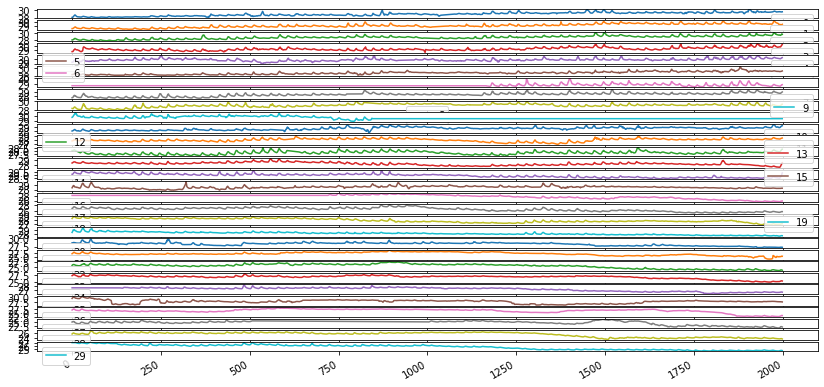

In [15]:
data_vectorized = pd.DataFrame(jts.tensor_to_vector(tensor_data))
data_vectorized.plot(figsize = (14, 7), subplots = True)

In [16]:
train_tensor = jts.extract_train_tensor(tensor_data, N_train)
test_tensor = jts.extract_test_tensor(tensor_data, N_train, N_test)

In [19]:
ltar = LTAR(train_tensor)
ltar.fit(5)

In [10]:
A = ltar.coefs[0]

In [11]:
import scipy.fft as sfft
import scipy.linalg as la
trans = sfft.dct(A, axis=1)
trans[0]

array([[ 1.98059235,  2.35051063,  2.28377017,  2.06254123,  2.17450555],
       [ 1.65075852,  1.00825615, -0.02982938, -0.98240642, -1.71149331],
       [ 1.35943479, -0.68457379, -1.72487901, -0.56031753,  1.31083987],
       [ 0.98767586, -1.6045101 ,  0.12029426,  1.43701889, -0.9343789 ],
       [ 0.52629122, -1.39933269,  1.59472413, -1.15327225,  0.52886317]])

In [12]:
u,v = la.eig(trans[0])
u

array([-2.91581557+0.38178551j, -2.91581557-0.38178551j,
        3.76755487+0.j        ,  2.64696391+0.2677136j ,
        2.64696391-0.2677136j ])

In [13]:
v

array([[ 0.39292951-0.23558262j,  0.39292951+0.23558262j,
         0.84723924+0.j        ,  0.19701832+0.10732552j,
         0.19701832-0.10732552j],
       [-0.12803026+0.21773494j, -0.12803026-0.21773494j,
         0.51193773+0.j        ,  0.67315334+0.j        ,
         0.67315334-0.j        ],
       [-0.78074092+0.j        , -0.78074092-0.j        ,
         0.13779204+0.j        , -0.02125007-0.07397728j,
        -0.02125007+0.07397728j],
       [-0.0872216 +0.16967478j, -0.0872216 -0.16967478j,
         0.02332642+0.j        , -0.54479831+0.36135447j,
        -0.54479831-0.36135447j],
       [ 0.19768464+0.20316061j,  0.19768464-0.20316061j,
        -0.02397204+0.j        , -0.14141142-0.20790852j,
        -0.14141142+0.20790852j]])

In [14]:
ltar.coefs

array([[[[ 8.80648181e-01,  4.09614214e-02,  5.63126539e-02,
           2.63835928e-02,  2.68462416e-02],
         [ 3.50770269e-02,  9.27500411e-01,  5.05606344e-02,
           3.86609844e-02,  2.73956603e-02],
         [ 3.14305211e-02,  9.20992844e-02,  8.92297646e-01,
           8.76631805e-02,  6.10552152e-02],
         [ 2.26946460e-02,  8.00532601e-02,  1.03336601e-01,
           8.16313057e-01,  7.43330137e-02],
         [ 2.04457995e-02,  3.46409392e-02,  3.93775487e-02,
           6.22498008e-02,  8.97622642e-01]],

        [[-2.49174852e-01,  3.01412445e-02,  1.38348304e-02,
           1.41744901e-02, -1.37027052e-03],
         [-8.48714210e-04, -2.69044840e-01,  1.20475487e-02,
           2.04248264e-02,  1.77947597e-02],
         [ 1.04379441e-02,  4.59809253e-03, -2.19516806e-01,
           3.13983514e-03,  4.51901335e-02],
         [ 1.35504395e-02,  1.37669384e-02,  1.25476588e-02,
          -2.48892155e-01,  2.27612273e-02],
         [ 9.26424828e-03,  6.31072100e-03, 

In [15]:
result_tensor = ltar.forecast(N_test)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

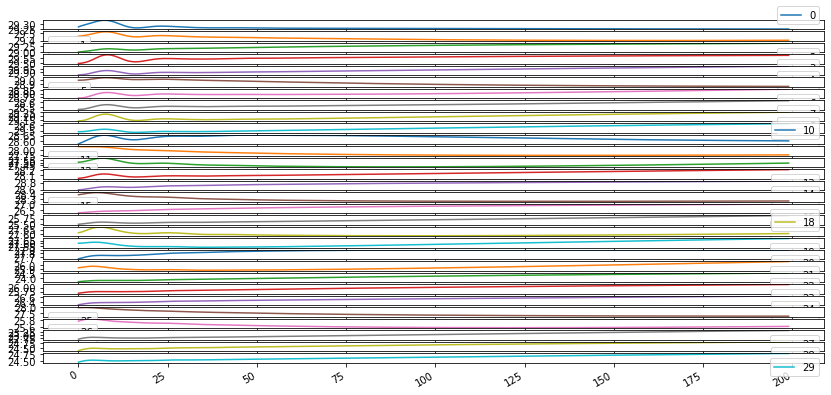

In [16]:
data_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
data_vectorized.plot(figsize = (14, 7), subplots = True)

In [17]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "VAR with DCT"})
error

,VAR with DCT
0,0.000951479
1,0.00168187
2,0.00188354
3,0.00222599
4,0.00354661
...,...
195,0.025828
196,0.0249994
197,0.0250034
198,0.0254856


<AxesSubplot:>

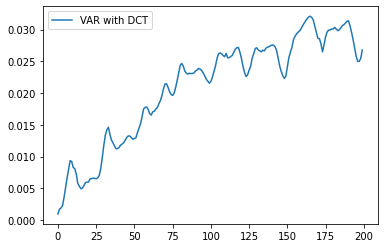

In [18]:
error.plot()

<AxesSubplot:>

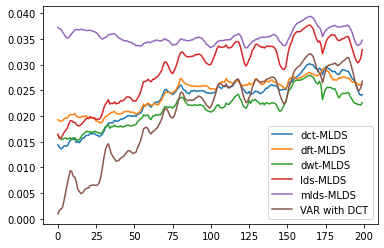

In [19]:
sst_err = sio.loadmat('data/sst_err.mat')
df = pd.DataFrame(np.transpose(sst_err['err_dct']), index=error.index, columns=["dct-MLDS"])
df1 = pd.DataFrame(np.transpose(sst_err['err_dft']), index=error.index, columns=["dft-MLDS"])
df2 = pd.DataFrame(np.transpose(sst_err['err_dwt']), index=error.index, columns=["dwt-MLDS"])
df3 = pd.DataFrame(np.transpose(sst_err['err_lds']), index=error.index, columns=["lds-MLDS"])
df4 = pd.DataFrame(np.transpose(sst_err['err_mlds']), index=error.index, columns=["mlds-MLDS"])
tensor_unfold_err = pd.read_csv("data/VAR_with_unfold.csv")
del tensor_unfold_err['Unnamed: 0']
df = pd.concat([df, df1, df2, df3, df4, error], axis=1)
df.plot()

<AxesSubplot:>

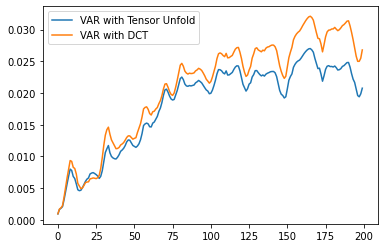

In [20]:
df = pd.concat([tensor_unfold_err, error], axis=1)
df.plot()

<AxesSubplot:title={'center':'Difference in % error with unfold and DCT'}>

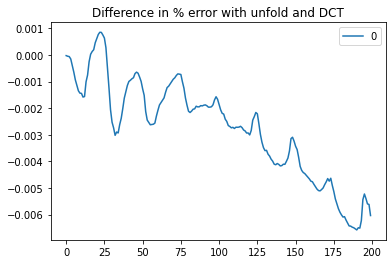

In [21]:
df = pd.DataFrame(tensor_unfold_err['VAR with Tensor Unfold'] - error['VAR with DCT'])
df.plot(title="Difference in % error with unfold and DCT")

<AxesSubplot:>

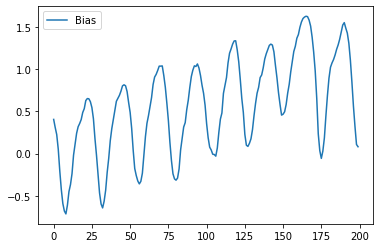

In [22]:
bias = pd.DataFrame(index = range(N_test), columns = ["Bias"])

norms = []
for i in range(N_test):
    norms.append(np.linalg.norm(result_tensor[i]))

avg_result_matrix_norm = np.average(norms)

for i in range(N_test):

    test_matrx_norm = np.linalg.norm(test_tensor[i])
    matrix_bias = avg_result_matrix_norm - test_matrx_norm
    bias.iloc[i] = matrix_bias
bias.plot()

In [23]:
bias.mean()

Bias    0.56635
dtype: float64

In [24]:
statistics.variance(norms)

0.037774533851757136

In [25]:
sqr_error = 0
for i in range(N_test):
    sqr_error += (norms[i] - np.linalg.norm(test_tensor[i]))**2
sqr_error / N_test

0.8028326398672414

In [26]:
error.mean()

VAR with DCT    0.020887
dtype: float64